In [42]:
import os, json
import pandas as pd

%matplotlib inline

In [2]:
def load_folder_csv(folder, prefix=None, sep=",",encoding="utf-8"):
    files = os.listdir(folder)
    if prefix is not None:
        files = [f for f in files if f.startswith(prefix)]
        
    dfs = []
    for f in files:
        in_p = os.path.join(folder, f)
        df = pd.read_csv(in_p, sep=sep, encoding=encoding)
        dfs.append(df)
        
    return pd.concat(dfs, ignore_index=True)

In [52]:
data_folder = "./data/sec"
num_prefix = "numbers_sec-numbers"

df_nums = load_folder_csv(data_folder, prefix=num_prefix)
len(df_nums)

C:\Users\lewen.zhao\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\lewen.zhao\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


5683436

In [53]:
df_nums.columns

Index(['submission_number', 'company_name', 'measure_tag', 'version',
       'period_end_date', 'number_of_quarters', 'units', 'dimension_hash',
       'iprx', 'value', 'footnote', 'footnote_length', 'num_dimensions',
       'coregistrant', 'duration_fraction', 'date_fraction', 'decimal'],
      dtype='object')

# Choose frequent tags 

In [55]:
tag_counts = df_nums['measure_tag'].value_counts().reset_index()
tag_counts.head(50)

,index,measure_tag
0,StockholdersEquity,77841
1,NetIncomeLoss,64151
2,StockholdersEquityIncludingPortionAttributable...,52191
3,OperatingIncomeLoss,50247
4,CashAndCashEquivalentsAtCarryingValue,48652
5,Revenues,42521
6,Assets,39778
7,IncomeTaxExpenseBenefit,38176
8,ProfitLoss,31364
9,SalesRevenueNet,30901


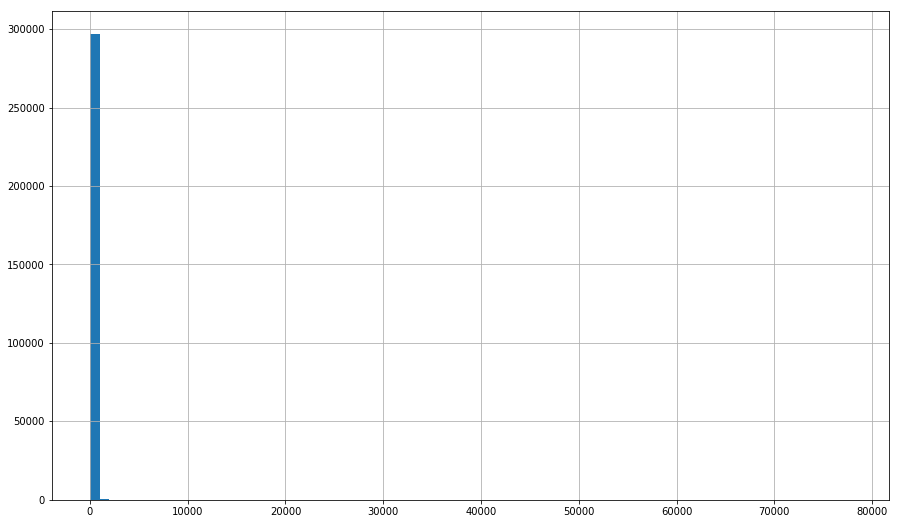

In [58]:
tag_counts['measure_tag'].hist(bins=80, figsize=(15,9))

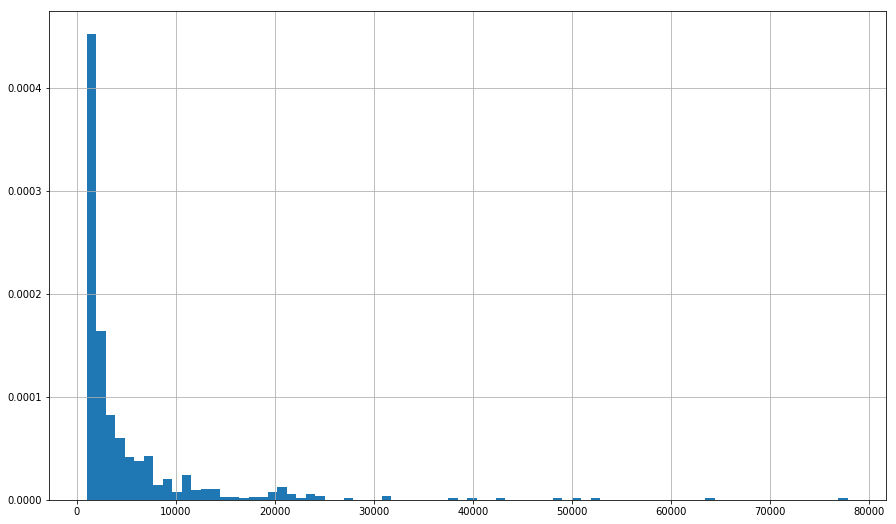

In [70]:
tag_counts.loc[tag_counts["measure_tag"]>1000, 'measure_tag'].hist(bins=80, figsize=(15,9), density=1)

In [75]:
freq_tags = tag_counts.loc[tag_counts["measure_tag"]>5000, 'index'].tolist()
len(freq_tags)

208

In [76]:
freq_tags

['StockholdersEquity',
 'NetIncomeLoss',
 'StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest',
 'OperatingIncomeLoss',
 'CashAndCashEquivalentsAtCarryingValue',
 'Revenues',
 'Assets',
 'IncomeTaxExpenseBenefit',
 'ProfitLoss',
 'SalesRevenueNet',
 'InterestExpense',
 'LiabilitiesAndStockholdersEquity',
 'AvailableForSaleSecurities',
 'IncomeLossFromContinuingOperationsBeforeIncomeTaxesMinorityInterestAndIncomeLossFromEquityMethodInvestments',
 'CashAndCashEquivalentsPeriodIncreaseDecrease',
 'NetCashProvidedByUsedInOperatingActivities',
 'PropertyPlantAndEquipmentNet',
 'NetCashProvidedByUsedInFinancingActivities',
 'AccumulatedOtherComprehensiveIncomeLossNetOfTax',
 'ComprehensiveIncomeNetOfTax',
 'EarningsPerShareBasic',
 'NetCashProvidedByUsedInInvestingActivities',
 'LiabilitiesCurrent',
 'AssetsCurrent',
 'EarningsPerShareDiluted',
 'CommonStockValue',
 'WeightedAverageNumberOfSharesOutstandingBasic',
 'Goodwill',
 'CommonStockSharesOutstanding',
 'ShareBased

In [77]:
with open('freq_tags.json', "w") as f:
    f.write(json.dumps(freq_tags))

# Looking into the meaning of columns

In [13]:
len(df_nums['submission_number'].unique())

8861

In [14]:
df_nums.head()

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
0,0000003453-10-000042,ALEXANDER & BALDWIN INC,StockholdersEquity,us-gaap/2009,20100630,0,USD,0x00000000,0,1.101000e+09,NaN,0,0,NaN,0.0,0.0,-5
1,0000003453-10-000042,ALEXANDER & BALDWIN INC,LiabilitiesAndStockholdersEquity,us-gaap/2009,20091231,0,USD,0x00000000,0,2.380000e+09,NaN,0,0,NaN,0.0,0.0,-5
2,0000003453-10-000042,ALEXANDER & BALDWIN INC,RealEstateHeldforsale,us-gaap/2009,20091231,0,USD,0x00000000,0,3.600000e+07,NaN,0,0,NaN,0.0,0.0,-5
3,0000003453-10-000042,ALEXANDER & BALDWIN INC,CashAndCashEquivalentsAtCarryingValue,us-gaap/2009,20091231,0,USD,0x00000000,0,1.600000e+07,NaN,0,0,NaN,0.0,0.0,-5
4,0000003453-10-000042,ALEXANDER & BALDWIN INC,DebtCurrent,us-gaap/2009,20100630,0,USD,0x00000000,0,5.600000e+07,NaN,0,0,NaN,0.0,0.0,-5


In [15]:
df_nums[df_nums['submission_number']=='0000003453-10-000042']

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
0,0000003453-10-000042,ALEXANDER & BALDWIN INC,StockholdersEquity,us-gaap/2009,20100630,0,USD,0x00000000,0,1.101000e+09,NaN,0,0,NaN,0.000000,0.0,-5
1,0000003453-10-000042,ALEXANDER & BALDWIN INC,LiabilitiesAndStockholdersEquity,us-gaap/2009,20091231,0,USD,0x00000000,0,2.380000e+09,NaN,0,0,NaN,0.000000,0.0,-5
2,0000003453-10-000042,ALEXANDER & BALDWIN INC,RealEstateHeldforsale,us-gaap/2009,20091231,0,USD,0x00000000,0,3.600000e+07,NaN,0,0,NaN,0.000000,0.0,-5
3,0000003453-10-000042,ALEXANDER & BALDWIN INC,CashAndCashEquivalentsAtCarryingValue,us-gaap/2009,20091231,0,USD,0x00000000,0,1.600000e+07,NaN,0,0,NaN,0.000000,0.0,-5
4,0000003453-10-000042,ALEXANDER & BALDWIN INC,DebtCurrent,us-gaap/2009,20100630,0,USD,0x00000000,0,5.600000e+07,NaN,0,0,NaN,0.000000,0.0,-5
5,0000003453-10-000042,ALEXANDER & BALDWIN INC,PropertyPlantAndEquipmentNet,us-gaap/2009,20091231,0,USD,0x00000000,0,1.536000e+09,NaN,0,0,NaN,0.000000,0.0,-5
6,0000003453-10-000042,ALEXANDER & BALDWIN INC,CashAndCashEquivalentsAtCarryingValue,us-gaap/2009,20100630,0,USD,0x00000000,0,3.600000e+07,NaN,0,0,NaN,0.000000,0.0,-5
7,0000003453-10-000042,ALEXANDER & BALDWIN INC,EmployeeRelatedLiabilitiesCurrent,us-gaap/2009,20091231,0,USD,0x00000000,0,1.800000e+07,NaN,0,0,NaN,0.000000,0.0,-5
8,0000003453-10-000042,ALEXANDER & BALDWIN INC,TreasuryStockValue,us-gaap/2009,20091231,0,USD,0x00000000,0,1.100000e+07,NaN,0,0,NaN,0.000000,0.0,-5
9,0000003453-10-000042,ALEXANDER & BALDWIN INC,PensionAndOtherPostretirementDefinedBenefitPla...,us-gaap/2009,20100630,0,USD,0x00000000,0,1.200000e+08,NaN,0,0,NaN,0.000000,0.0,-5


In [16]:
df_nums[df_nums['submission_number']=='0000003453-10-000042']['measure_tag'].value_counts()

IncomeTaxExpenseBenefit                                                      4
NetIncomeLoss                                                                4
InterestExpense                                                              4
IncomeLossFromDiscontinuedOperationsNetOfTaxAttributableToReportingEntity    4
SalesRevenueNet                                                              4
IncomeBeforeTaxes                                                            4
OperatingExpenses                                                            4
EarningsPerShareDiluted                                                      4
WeightedAverageNumberOfDilutedSharesOutstanding                              4
IncomeLossFromContinuingOperations                                           4
EarningsPerShareBasic                                                        4
OperatingIncomeLoss                                                          4
IncomeLossFromDiscontinuedOperationsNetOfTaxPerDilut

In [17]:
df_nums[(df_nums['submission_number']=='0000003453-10-000042')&(df_nums['measure_tag']=='NetIncomeLoss')]

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
289335,0000003453-10-000042,ALEXANDER & BALDWIN INC,NetIncomeLoss,us-gaap/2009,20090630,1,USD,0x00000000,0,12600000.0,NaN,0,0,NaN,0.013699,0.0,-5
289340,0000003453-10-000042,ALEXANDER & BALDWIN INC,NetIncomeLoss,us-gaap/2009,20100630,1,USD,0x00000000,0,28900000.0,NaN,0,0,NaN,0.013699,0.0,-5
421200,0000003453-10-000042,ALEXANDER & BALDWIN INC,NetIncomeLoss,us-gaap/2009,20100630,2,USD,0x00000000,0,46200000.0,NaN,0,0,NaN,0.027398,0.0,-5
421227,0000003453-10-000042,ALEXANDER & BALDWIN INC,NetIncomeLoss,us-gaap/2009,20090630,2,USD,0x00000000,0,15600000.0,NaN,0,0,NaN,0.027398,0.0,-5


In [19]:
df_nums[(df_nums['submission_number'].str.startswith('0000003453'))&(df_nums['measure_tag']=='NetIncomeLoss')]

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
289335,0000003453-10-000042,ALEXANDER & BALDWIN INC,NetIncomeLoss,us-gaap/2009,20090630,1,USD,0x00000000,0,12600000.0,NaN,0,0,NaN,0.013699,0.0,-5
289340,0000003453-10-000042,ALEXANDER & BALDWIN INC,NetIncomeLoss,us-gaap/2009,20100630,1,USD,0x00000000,0,28900000.0,NaN,0,0,NaN,0.013699,0.0,-5
421200,0000003453-10-000042,ALEXANDER & BALDWIN INC,NetIncomeLoss,us-gaap/2009,20100630,2,USD,0x00000000,0,46200000.0,NaN,0,0,NaN,0.027398,0.0,-5
421227,0000003453-10-000042,ALEXANDER & BALDWIN INC,NetIncomeLoss,us-gaap/2009,20090630,2,USD,0x00000000,0,15600000.0,NaN,0,0,NaN,0.027398,0.0,-5


In [31]:
compname_sub = df_nums[df_nums['number_of_quarters']==1][['company_name','submission_number']].drop_duplicates().groupby('company_name').count()

In [32]:
compname_sub = compname_sub.reset_index()

In [33]:
compname_sub[compname_sub['company_name']=="ALEXANDER & BALDWIN INC"]

,company_name,submission_number
220,ALEXANDER & BALDWIN INC,1


In [36]:
compname_sub.sort_values(by=['submission_number'], ascending=False)

,company_name,submission_number
2081,EMPIRE GLOBAL CORP.,13
6054,TETRIDYN SOLUTIONS INC,8
6788,"XIANGTIAN (USA) AIR POWER CO., LTD.",8
2566,FUTURE HEALTHCARE OF AMERICA,8
945,BONANZA GOLD CORP.,6
1216,"CD INTERNATIONAL ENTERPRISES, INC.",6
5584,"SITO MOBILE, LTD.",5
1105,CANNAVEST CORP.,5
3472,"KBR, INC.",5
731,B4MC GOLD MINES INC,5


In [37]:
df_nums[(df_nums['company_name'] =='EMPIRE GLOBAL CORP.')&(df_nums['measure_tag']=='NetIncomeLoss')]

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
716665,0001017386-15-000147,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20120630,10,USD,0x00000000,0,-116393.0,NaN,0,0,NaN,0.060274,0.0,0
724426,0001017386-15-000149,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20120930,3,USD,0x00000000,0,-12218.0,NaN,0,0,NaN,0.008220,0.0,0
728706,0001017386-15-000163,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20130630,14,USD,0x00000000,0,-140551.0,NaN,0,0,NaN,0.060274,0.0,0
732608,0001017386-15-000179,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20140331,17,USD,0x00000000,0,-193029.0,NaN,0,0,NaN,0.057535,0.0,0
1044529,0001017386-15-000161,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20120331,1,USD,0x00000000,0,-3755.0,NaN,0,0,NaN,0.013699,0.0,0
1045865,0001017386-15-000181,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20140630,1,USD,0x00000000,0,-27590.0,NaN,0,0,NaN,0.013699,0.0,0
1126480,0001017386-15-000142,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20120331,1,USD,0x00000000,0,-3755.0,NaN,0,0,NaN,0.013699,0.0,0
1156286,0001017386-15-000163,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20130630,1,USD,0x00000000,0,-3901.0,NaN,0,0,NaN,0.013699,0.0,0
1157813,0001017386-15-000147,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20120630,1,USD,0x00000000,0,-3590.0,NaN,0,0,NaN,0.013699,0.0,0
1238095,0001017386-15-000181,EMPIRE GLOBAL CORP.,NetIncomeLoss,us-gaap/2015,20130630,2,USD,0x00000000,0,-8080.0,NaN,0,0,NaN,0.027398,0.0,0


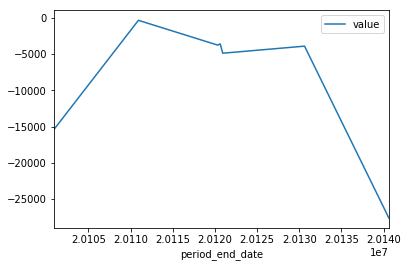

In [45]:
df_nums[(df_nums['company_name'] =='EMPIRE GLOBAL CORP.')&(df_nums['measure_tag']=='NetIncomeLoss')
        &(df_nums['number_of_quarters']==1)].sort_values(by=['period_end_date']).drop_duplicates('period_end_date').plot(x="period_end_date",y='value')